In [225]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob

In [226]:
# Read in image
test_roi = cv2.imread('D:\Bui Tuan\Iopen.jpg')
cv2.imshow('img', test_roi)
mser = cv2.MSER_create()

In [227]:
# Read in image
LpImg = cv2.imread('D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/00003526_92C12684.jpg.jpg')
cv2.imshow('LpImg', LpImg)

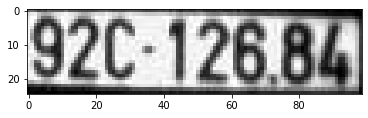

In [228]:
plt.imshow(LpImg)
plt.show()

In [229]:
type(LpImg)

numpy.ndarray

In [230]:
plate_image = cv2.convertScaleAbs(LpImg, alpha=(255.0))

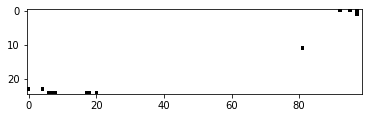

In [231]:
plt.imshow(plate_image)
plt.show()

In [232]:
plate_image = LpImg.copy()

In [233]:
print(plate_image)

[[[ 99  99  99]
  [110 110 110]
  [ 96  96  96]
  ...
  [  3   3   3]
  [  0   0   0]
  [  9   9   9]]

 [[215 215 215]
  [234 234 234]
  [240 240 240]
  ...
  [ 12  12  12]
  [  0   0   0]
  [  3   3   3]]

 [[231 231 231]
  [254 254 254]
  [255 255 255]
  ...
  [ 68  68  68]
  [ 39  39  39]
  [ 14  14  14]]

 ...

 [[ 50  50  50]
  [ 50  50  50]
  [ 60  60  60]
  ...
  [182 182 182]
  [160 160 160]
  [ 37  37  37]]

 [[  0   0   0]
  [ 11  11  11]
  [ 14  14  14]
  ...
  [128 128 128]
  [119 119 119]
  [ 12  12  12]]

 [[  1   1   1]
  [  6   6   6]
  [  3   3   3]
  ...
  [ 41  41  41]
  [ 42  42  42]
  [  4   4   4]]]


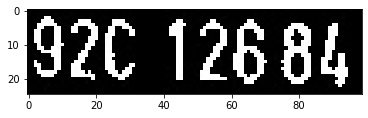

In [234]:
plt.imshow(test_roi)
plt.show()

In [235]:
print(test_roi)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [2 2 2]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [236]:
test_roi = cv2.cvtColor(test_roi, cv2.COLOR_RGB2GRAY)

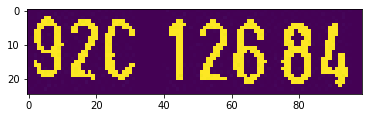

In [237]:
plt.imshow(test_roi)
plt.show()

In [238]:
test_roi.dtype

dtype('uint8')

In [249]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(test_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [88]:
#test_roi = plate_image.copy()

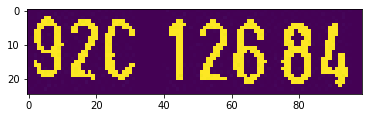

In [250]:
plt.imshow(test_roi)

In [251]:
test_roi.shape

(25, 99)

In [252]:
crop_characters = []

In [253]:
digit_w, digit_h = 25, 15

In [254]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(test_roi, cv2.MORPH_DILATE, kernel3)

Detect 0 letters...


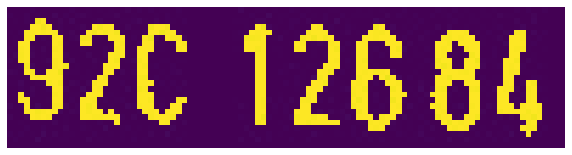

In [255]:
for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/test_roi.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
#plt.savefig('grab_digit_contour.png',dpi=300)

In [213]:
fig = plt.Lpimg(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.imshow(crop_characters[i],cmap="gray")

AttributeError: module 'matplotlib.pyplot' has no attribute 'Lpimg'